<h2>Decision tree</h2>

In [7]:
# load data
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from math import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = np.loadtxt('data_1.csv', delimiter = ',')

pred = np.delete(data, 13, axis = 1) # pred[i][j]
y = np.delete(data, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], axis = 1) # klase[i][0] - classes 0 and 1

def column(matrix, p):
    return np.array([row[p] for row in matrix])

kolona_1 = 3
kolona_2 = 4

X = np.c_[column(pred, kolona_1), column(pred, kolona_2)]

In [8]:
# standardization
sr_vr = [] # mean values vector for all features
for j in range(0, 2):
    suma = 0
    std_clan = 0
    std2 = 0
    for i in range(0, len(X)):
        suma += X[i][j]
    sr_vr.append(suma / len(X)) # mean values
    
    for k in range(0, len(X)):
        std_clan += (X[k][j] - sr_vr[j]) ** 2 # calculate the sum for std dev
    std2 = 1 / len(X) * std_clan # std_dev ^ 2
    
    for q in range(0, len(X)):
        X[q][j] = (X[q][j] - sr_vr[j]) / sqrt(std2)

In [9]:
# check if the standardization is done correctly
sr_vr1 = []
for k in range(0, 2):
    suma11 = 0
    for i in range(0, len(X)):
        suma11 += X[i][k]
    sr_vr1.append(suma11 / len(X)) # mean values

    std_clan1 = 0
    std12 = 0
    for z in range(0, len(X)):
        std_clan1 += (X[z][j] - sr_vr1[k]) ** 2 # calculate the sum for std dev
    std12 = 1 / len(X) * std_clan1 # std_dev ^ 2
    
sr_vr1

[1.170004264412665e-16, -4.457972452725629e-16]

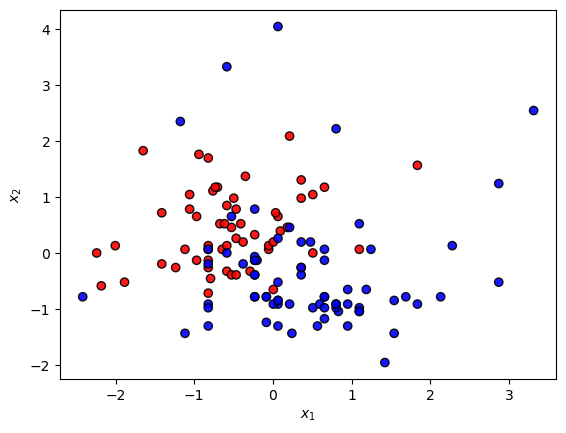

In [10]:
x_osa = column(X, 0)
y_osa = column(X, 1)

colors = []

for i in range(0, len(X)):
    if(y[i][0] == 0):
        colors.append('red')
    if(y[i][0] == 1):
        colors.append('blue')

plt.scatter(x_osa, y_osa, c = y.ravel(), alpha = 0.9, cmap = matplotlib.colors.ListedColormap(colors), edgecolor = 'black')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()

Accuracy: 76.92307692307693
Accuracy: 69.23076923076923
Accuracy: 80.76923076923077
Accuracy: 80.76923076923077
Accuracy: 80.76923076923077
Accuracy: 73.07692307692307
Accuracy: 73.07692307692307
Accuracy: 73.07692307692307
Accuracy: 76.92307692307693
Accuracy: 80.76923076923077


Text(0, 0.5, 'Accuracy [%]')

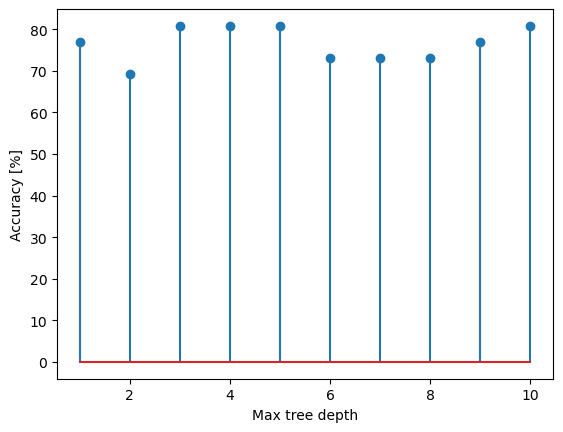

In [11]:
tacnosti = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) # 80% (104) training and 20% (26) test
for i in range(1, 11):
    clf = DecisionTreeClassifier(max_depth = i)

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("Accuracy:", metrics.accuracy_score(y_test, y_pred) * 100)
    tacnosti.append(metrics.accuracy_score(y_test, y_pred) * 100)
    
niz = np.linspace(1, 10, 10)

plt.stem(niz, tacnosti)
plt.xlabel('Max tree depth')
plt.ylabel('Accuracy [%]')

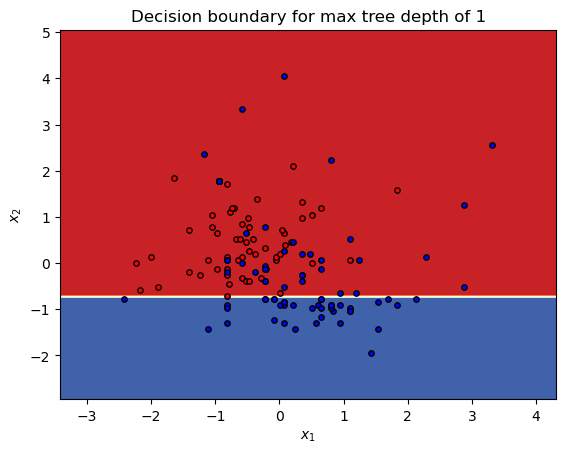

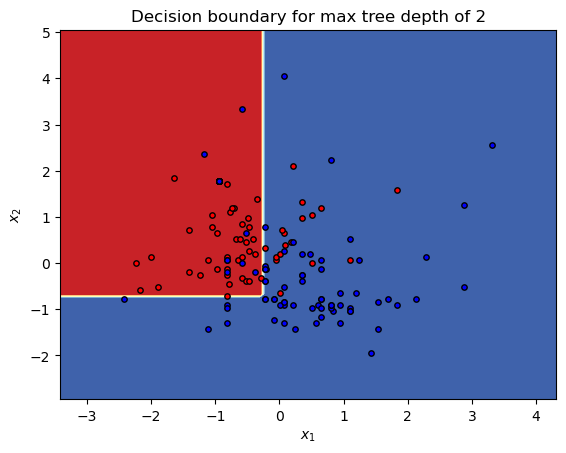

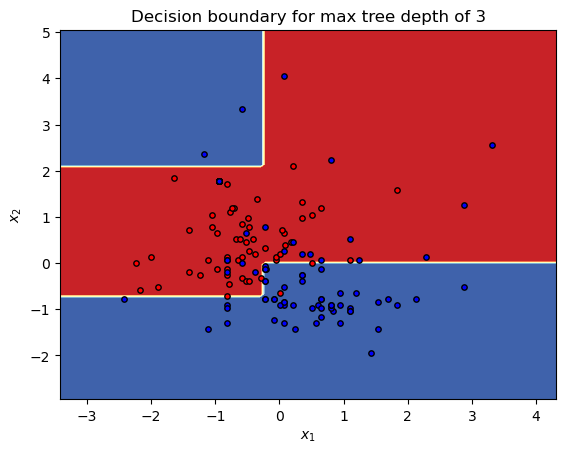

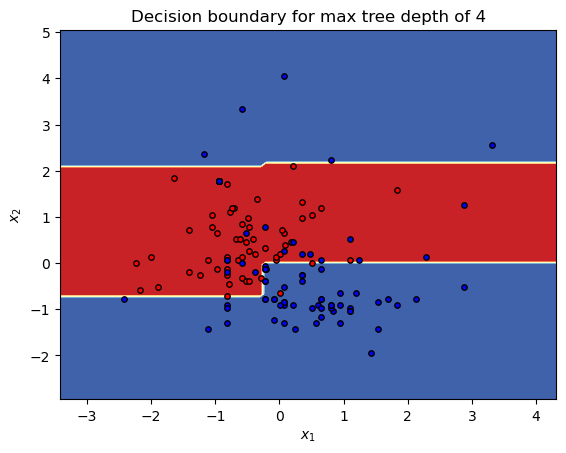

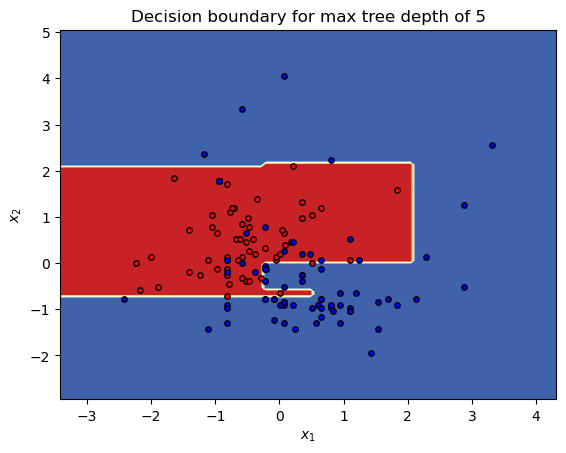

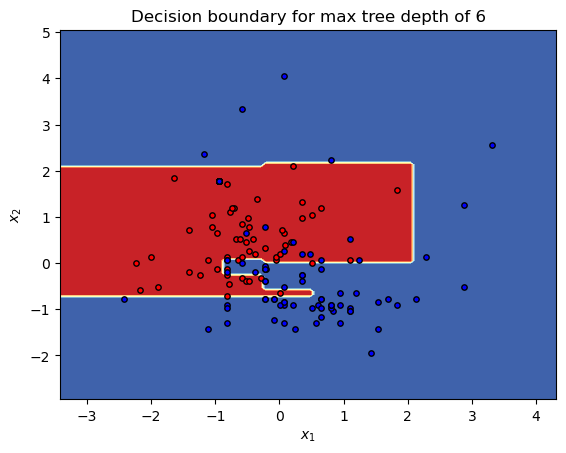

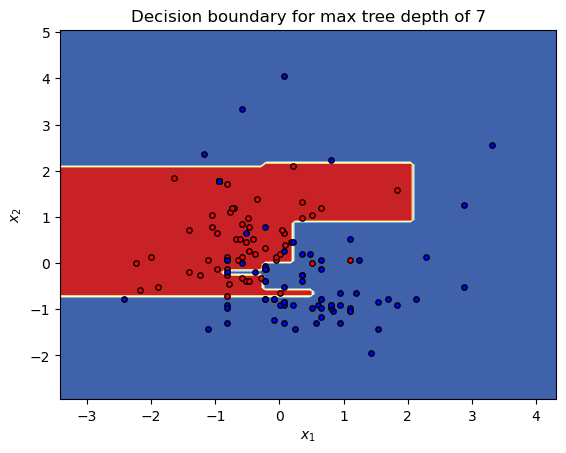

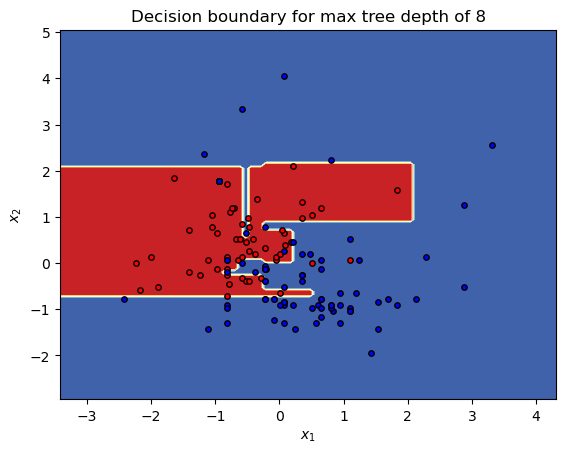

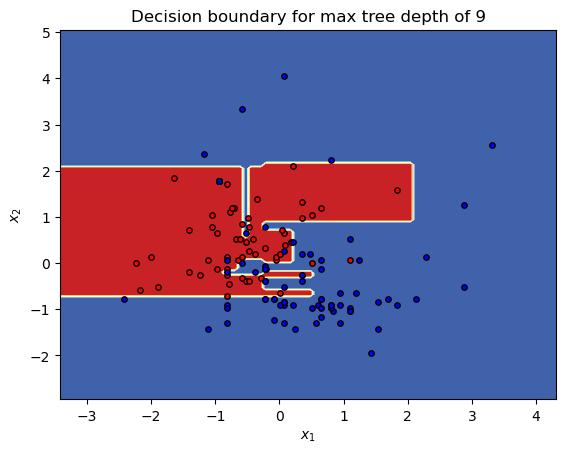

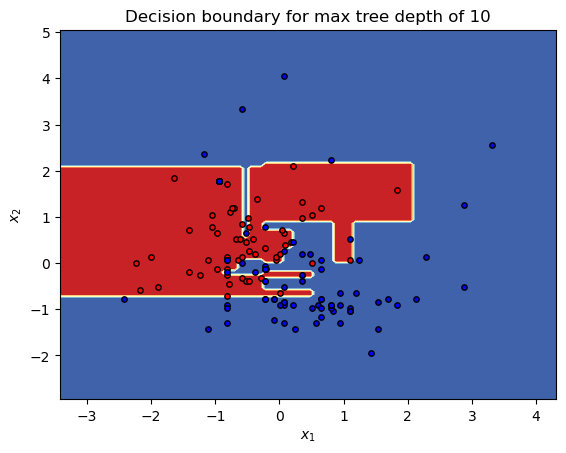

In [12]:
n_classes = 2
plot_colors = "rb"

br = 0
for i in range(1, 11):
    clf = DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(X, y)

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap = plt.cm.RdYlBu,
        response_method = "predict",
        xlabel = '$x_{1}$',
        ylabel = '$x_{2}$'
    )
    
    # Plot training data
    for j, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == j)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c = color,
            cmap = plt.cm.RdYlBu,
            edgecolor = "black",
            s = 15,
        )
    br += 1
    plt.title("Decision boundary for max tree depth of " + str(br))